In [1]:
import pandas as pd
import numpy as np

In [2]:
import pathlib
pathlib.Path()

PosixPath('.')

In [3]:
current_path = pathlib.Path().resolve()
current_path

PosixPath('/home/santi/personalProjects/EDA_Pereira_suicide/eda_pereira_info/notebook')

In [4]:
df = pd.read_csv(current_path.parent.joinpath("data", "Casos_intento_suicida.csv"))
df.head(5)

,CODIGO EVENTO,SEMANA,AÑO,EDAD,UNIDAD MEDIDA EDAD,GENERO,AREA,TIPO SEGURIDAD SOCIAL,NOMBRE EVENTO
0,356,1,2016,31,1,M,CABECERA MUNICIPAL,CONTRIBUTIVO,INTENTO DE SUICIDIO
1,356,2,2016,27,1,F,CABECERA MUNICIPAL,CONTRIBUTIVO,INTENTO DE SUICIDIO
2,356,3,2016,17,1,M,CABECERA MUNICIPAL,SUBSIDIADO,INTENTO DE SUICIDIO
3,356,6,2016,22,1,F,CABECERA MUNICIPAL,NO ASEGURADO,INTENTO DE SUICIDIO
4,356,6,2016,14,1,F,CABECERA MUNICIPAL,SUBSIDIADO,INTENTO DE SUICIDIO


In [5]:
df.shape

(2020, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODIGO EVENTO          2020 non-null   int64 
 1   SEMANA                 2020 non-null   int64 
 2   AÑO                    2020 non-null   int64 
 3   EDAD                   2020 non-null   int64 
 4   UNIDAD MEDIDA EDAD     2020 non-null   int64 
 5   GENERO                 2020 non-null   object
 6   AREA                   2020 non-null   object
 7   TIPO SEGURIDAD SOCIAL  2020 non-null   object
 8   NOMBRE EVENTO          2020 non-null   object
dtypes: int64(5), object(4)
memory usage: 142.2+ KB


In [7]:
df.describe()

,CODIGO EVENTO,SEMANA,AÑO,EDAD,UNIDAD MEDIDA EDAD
count,2020.0,2020.000000,2020.000000,2020.000000,2020.0
mean,356.0,26.646040,2018.043069,25.095050,1.0
std,0.0,14.558654,1.061565,13.005233,0.0
min,356.0,1.000000,2016.000000,6.000000,1.0
25%,356.0,14.000000,2017.000000,16.000000,1.0
50%,356.0,26.000000,2018.000000,21.000000,1.0
75%,356.0,39.000000,2019.000000,31.000000,1.0
max,356.0,52.000000,2019.000000,89.000000,1.0


In [8]:
#variables para trabajar

df = df[["AÑO", "EDAD", "GENERO"]]
df

,AÑO,EDAD,GENERO
0,2016,31,M
1,2016,27,F
2,2016,17,M
3,2016,22,F
4,2016,14,F
...,...,...,...
2015,2019,75,M
2016,2019,14,M
2017,2019,13,F
2018,2019,17,F


##Análisis unidimensional de las variables

In [9]:
#validamos los años de los registros de los datos
df["AÑO"].unique()

array([2016, 2017, 2018, 2019])

In [10]:
#hubo un caso de intento de suicidio de una persona con 6 años de edad, y almenos una con 89 años de edad
df["EDAD"].describe()

count    2020.000000
mean       25.095050
std        13.005233
min         6.000000
25%        16.000000
50%        21.000000
75%        31.000000
max        89.000000
Name: EDAD, dtype: float64

<AxesSubplot:>

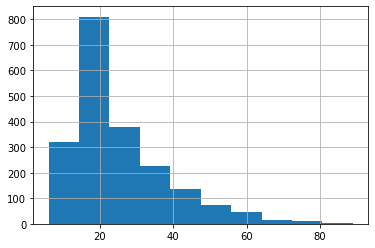

In [11]:
#la mayor cantidad de intento de suicidios están en las personas con 20 años
df["EDAD"].hist()

<AxesSubplot:>

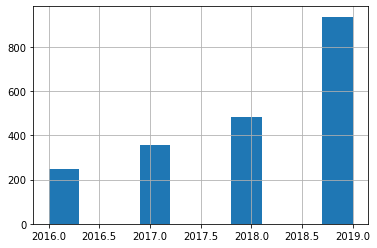

In [12]:
df["AÑO"].hist()

<AxesSubplot:>

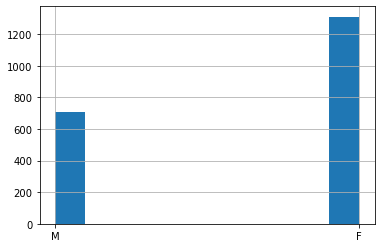

In [13]:
df["GENERO"].hist()

## Análisis multidimensional

In [14]:
import matplotlib.pylab as plt
import seaborn as sns

In [15]:
df["MUJER"] = df.apply(lambda x: 1 if x["GENERO"] == "F" else 0, axis = 1)
df["HOMBRE"] = df.apply(lambda x: 1 if x["GENERO"] == "M" else 0, axis = 1)
df

,AÑO,EDAD,GENERO,MUJER,HOMBRE
0,2016,31,M,0,1
1,2016,27,F,1,0
2,2016,17,M,0,1
3,2016,22,F,1,0
4,2016,14,F,1,0
...,...,...,...,...,...
2015,2019,75,M,0,1
2016,2019,14,M,0,1
2017,2019,13,F,1,0
2018,2019,17,F,1,0


<AxesSubplot:>

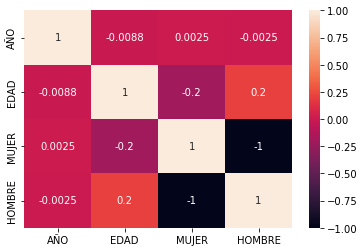

In [16]:
corr = df.corr()
sns.heatmap(corr, annot=True)

In [17]:
print("porcentaje de mujeres con intentos de suicicio:" ,df["MUJER"].sum()*100 / 2020)
print("porcentaje de hombres con intentos de suicicio:" ,df["HOMBRE"].sum()*100 / 2020)

porcentaje de mujeres con intentos de suicicio: 64.9009900990099
porcentaje de hombres con intentos de suicicio: 35.0990099009901


In [18]:
df.to_csv(current_path.parent.joinpath("data", "Casos_intento_suicida_depurado.csv"))